# Video Games Sales Analysis


#### By: Lalith Sagar M


#### Data Source: [Video Games Sales with Ratings](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings?resource=download)

## Project Overview:

For an online store of computer games, it is necessary to conduct a market analysis, identify patterns that determine the success of games, determine a user profile for each region, and test working hypotheses. This will allow you to place a bet on a potentially popular product and plan advertising campaigns, helping to develop the store’s business.

The data is collected from open sources and recorded in the Video_Games_Sales_as_at_22_Dec_2016.csv file. The data includes information from 1983 to 2016. Data for 2016 may be incomplete.

Description of Video_Games_Sales_as_at_22_Dec_2016.csv data:

* Name - the name of the game
* Platform - platform
* Year_of_Release — year of release
* Genre - game genre
* NA_sales - sales in North America (millions of dollars)
* EU_sales - sales in Europe (millions of dollars)
* JP_sales - sales in Japan (millions of dollars)
* Other_sales - sales in other countries (millions of dollars)
* Critic_Score - critics' score (from 0 to 100)
* User_Score - user rating (from 0 to 10)
* Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

## Project stages

- **1. Obtaining data**
- **2. Data preprocessing** 
- **3. Exploratory data analysis**
- **4. User profile for each region**
- **5. Study of statistical indicators**
- **6. Testing hypotheses**
- **7. Research results**

# Stage 1. Obtaining data

Let's study the data provided for the project.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading Data file from CSV and save to df
df=pd.read_csv(r"C:\Users\lalit\OneDrive\Courses\python\project 5 Video Game\Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#Get info about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_Sales         16715 non-null  float64
 5   EU_Sales         16715 non-null  float64
 6   JP_Sales         16715 non-null  float64
 7   Other_Sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Let's consider the information received in more detail.

There are a total of 11 columns in the table. There are two data types: non-null object (5 columns) and non-null float64 (6 columns).

Let's take a closer look at what columns are in df and what information they contain:

- Name - the name of the game
- Platform - platform
- Year_of_Release — year of release
- Genre - game genre
- NA_sales - sales in North America (millions of dollars)
- EU_sales - sales in Europe (millions of dollars)
- JP_sales - sales in Japan (millions of dollars)
- Other_sales - sales in other countries (millions of dollars)
- Critic_Score - critics' score (from 0 to 100)
- User_Score - user rating (from 0 to 10)
- Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

The number of values in the columns varies. This indicates that there are missing values in the data.

## Conclusions.

Each row of the table contains historical game sales data, user and expert ratings, genres and platforms (for example, Xbox or PlayStation), year of release and assigned age rating.

Two problems that need to be addressed in the next step are omissions and poor column names.

The columns Genre, Platform, Year_of_Release and the breakdown of sales by region are especially valuable for testing working hypotheses. Using them, we will be able to track how user preferences have changed over time and create a portrait of a user in each region. The Critic_Score, User_Score, Rating columns will help test hypotheses about the impact of game ratings on sales depending on the genre and platform of the games.


# Stage 2. Data preprocessings


We will replace the column names, convert the data into the required types, process gaps (with filling where possible), check the data for duplicates, and also calculate the total sales in all regions and write them in a separate column.



In [4]:
#Getting a list of column names
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Column names are capitalized, which is not very convenient for accessing data. Let's rename the columns for the convenience of further work. Let's check the result.

In [5]:
#Renaming Columns
df.columns=df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

We need to check for duplicates and take corrective action for the same

In [6]:
#Getting the total number of duplicates in the df table
df.duplicated().sum()

0

No duplicates found. Let's deal with missing values.

In [7]:
#Checking for missing values
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Handling missing data in the 'name' column

First, let's look at the rows with missing data in the name column.

In [8]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are only two such lines. Moreover, these lines contain gaps in other columns (genre, critic_score, user_score, rating) and refer to games released in 1993 on the GEN platform. Thus, we will consider these rows not relevant and not capable of significantly influencing the results of the analysis, so we will delete these rows.

In [9]:
#Remove rows with missing data in the name column
#Reset indexes
df=df.dropna(subset=['name']).reset_index(drop=True)

In [10]:
#Checking for other missing values
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

There is no longer any missing data in the name column

#### Handling missing data in 'year_of_release' column

Let's look at the missing data in the year_of_release column

In [11]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


We do not have release year data for 269 games.
Note that some of the lines in the game title have the year of release. It can be used as a replacement for missing data for the year_of_release column

Let's search for such strings and create a dictionary, where the key will be the index of the string in which the year of release is present in the game name itself, and the value will be the year of release itself.

In [12]:
idx_year = {} # create an empty dictionary

#Iterate over rows with no year information
for row in df[df['year_of_release'].isna()].itertuples():
    for item in row.name.split(' '): #Split the game name into separate words
        if item==row.name.split(' ')[-1]: #Take the last word from the list
            try: #If the last word is a number then
                if len(item) == 2 or len(item) == 4: #Check its "length"
                    item = int(item) #Convert the data type
                    if item < 21: #Convert the years of this century to the full date
                         item += 2000
                    elif item > 80 and item < 100: #Convert the years of the last century to the full date
                         item += 1900
                    if item >= 1980: #1980 is the minimum year value in our data
                         idx_year[row.Index] = item
            except: #If the last word is not a number then continue to iterate over the lines
                 continue

#Check the resulting dictionary by displaying it on the screen
for key, value in idx_year.items():
     print(f'index: {key} | year:{value}')
    
    

index: 183 | year:2004
index: 377 | year:2004
index: 475 | year:2006
index: 1300 | year:1999
index: 1649 | year:2003
index: 2478 | year:2007
index: 2848 | year:2011
index: 3412 | year:2006
index: 3485 | year:2002
index: 4204 | year:2007
index: 4774 | year:2003
index: 5155 | year:2003
index: 5654 | year:2005
index: 5888 | year:2003
index: 8917 | year:2005
index: 13194 | year:2011
index: 13928 | year:2006
index: 15951 | year:2008
index: 16077 | year:2007
index: 16371 | year:2008


We replace the missing values with year values obtained from the names of the games.

In [13]:
#Iterate through the dictionary and make replacements
for key, v in idx_year.items():
     df.loc[key, 'year_of_release']=v

Let's check the data for the replacements made in the previous step.

In [14]:
#Select rows with missing data in the year_of_release column
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Now we don't have any release year data for 249 games. This is less than after the previous check, which means the replacements were completed successfully.
It may be possible to find the release years of the games for the remaining 249 lines by parsing pages on the Internet, but at this stage we consider it possible to simply get rid of these lines and continue working with the existing dataset. because 249 rows are only about 1.49% of the total amount of data, which should not significantly affect the results of the study.

In [15]:
#Removing rows with missing data in the year_of_release column
#Reseting indexes
df=df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release'].isna().any()

False

In [16]:
#Checking for missing values
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating             6682
dtype: int64

There are no longer missing data in the year_of_release column

### Handling missing data in 'critic_score' column

Let's look at the missing data in the critic_score column

In [17]:
#Selecting rows with missing data in the critic_score column
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16460,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16461,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16462,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


We don't have critic rating data for 8,466 games, which is about 51% of games.

Let's try to find a correlation in the available data between critics' ratings and:

the year the game was released (what if critics were more favorable in some years?)
sales in North America (na_sales)
sales in Europe (eu_sales)
sales in Japan (jp_sales)
sales in other regions (other_sales)
total sales worldwide (global_sales)

Finding the Pearson correlation coefficient (year of release of the game VS critics' rating)

In [18]:
df['year_of_release'].corr(df['critic_score'])

0.010353467558889762

The correlation is very weak. Its almost completely absent.

Let's calculate the total sales for each game around the world (create a new column global_sales)

In [19]:
#Summing up all sales
df['global_sales']=df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16460,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16461,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16462,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Finding the Pearson correlation coefficient (sales in North America VS critics' ratings)

In [20]:
df['na_sales'].corr(df['critic_score'])

0.24081751449345798

Correlation is weak

Finding the Pearson correlation coefficient (sales in Europe VS critics' ratings)

In [21]:
df['eu_sales'].corr(df['critic_score'])

0.221334645150233

Correlation is weak

Finding the Pearson correlation coefficient (sales in Japan VS critics' ratings)

In [22]:
df['jp_sales'].corr(df['critic_score'])

0.15319263872334976

The correlation is very weak

Finding the Pearson correlation coefficient (sales in other regions VS critics' ratings)

In [23]:
df['other_sales'].corr(df['critic_score'])

0.19891456778301783

The correlation is very weak

Finding the Pearson correlation coefficient (total sales worldwide VS critics' ratings)

In [24]:
df['global_sales'].corr(df['critic_score'])

0.24584356447587416

Correlation is weak

In all the cases considered, we received either a very weak or simply weak correlation between the considered characteristics and the critics’ assessment:


Therefore, averaging critics' ratings on one of these criteria to fill gaps in data does not seem appropriate.

### Handling missing data in 'user_score' column

Now let's look at the missing data in the user_score column.

First, let's look at the values in the user_score column.

In [25]:
df.user_score.value_counts()

user_score
tbd    2378
7.8     322
8       285
8.2     277
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

The most common value is not the user's numerical rating, but the string 'tbd', meaning 'to be defined'. In this situation, we can use the property of the average: if we add a number equal to the average to the dataset, then the new average of the dataset will not change, so we can replace tbd with the average in the same way as in cases of missing NaN values.

In [26]:
#Replacing 'tbd' with NaN
df=df.replace('tbd',np.nan)

In [27]:
#Checking the success of the replacement by checking total number of missing values in the df table
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating             6682
global_sales          0
dtype: int64

Let's change the 'user_score' data type from string to floating point numbers

In [28]:
df['user_score'] = df.user_score.astype('float')

Checking if changing the 'user_score' data type worked

In [29]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
global_sales       float64
dtype: object

The data type has been changed from object to float64. Now we can perform mathematical operations on the user_score column data.

Finding the Pearson correlation coefficient (year of release of the game VS user rating)

In [30]:
df['year_of_release'].corr(df['user_score'])

-0.2682635599589682

We have a weak negative correlation.

Finding the Pearson correlation coefficient (sales in North America VS user ratings)

In [31]:
df['na_sales'].corr(df['user_score'])

0.08570745189151249

The correlation is very weak

Finding the Pearson correlation coefficient (sales in Europe VS user ratings)

In [32]:
df['eu_sales'].corr(df['user_score'])

0.055267291304242364

The correlation is very weak

Finding the Pearson correlation coefficient (sales in Japan VS user ratings)

In [33]:
df['jp_sales'].corr(df['user_score'])

0.12617410277268787

The correlation is very weak

Finding the Pearson correlation coefficient (sales in other regions VS user ratings)

In [34]:
df['other_sales'].corr(df['user_score'])

0.05701154340120891

The correlation is very weak

Finding the Pearson correlation coefficient (total sales worldwide VS user ratings)

In [35]:
df['global_sales'].corr(df['user_score'])

0.08797432650715242

The correlation is very weak

Let's find the Pearson correlation coefficient (critic ratings VS user ratings)

In [36]:
df['critic_score'].corr(df['user_score'])

0.5792013058120697

Correlation is average

Let's look at the distributions of user ratings and critic ratings and their dependencies.

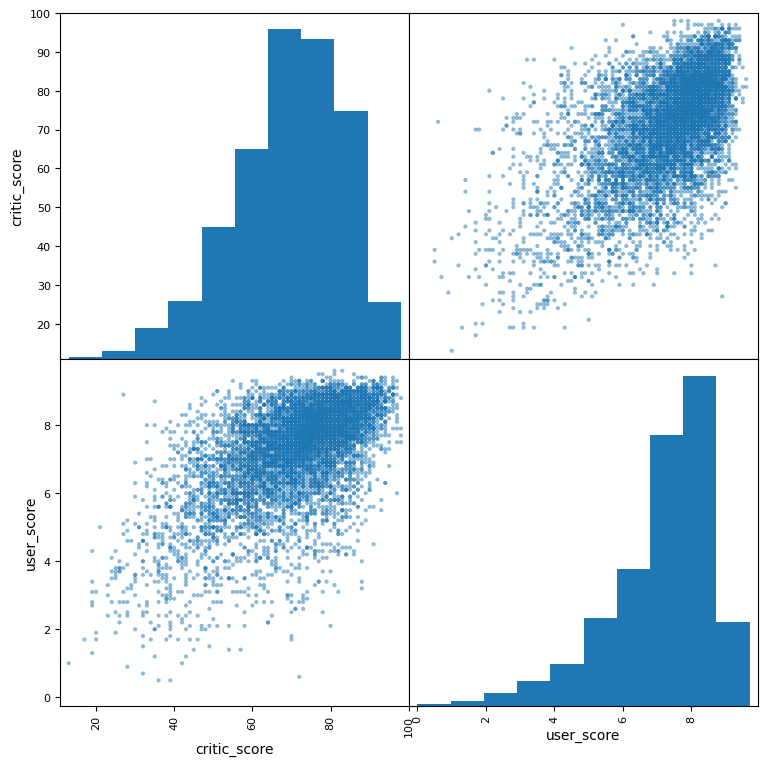

In [37]:
pd.plotting.scatter_matrix(df[['critic_score', 'user_score']], figsize=(9,9));

The distributions are close to normal. The correlation is moderate.

In all the cases considered, we received either a very weak or simply weak correlation between the considered features and user ratings. An average correlation was obtained only between user ratings and critic ratings:

minimum 'game sales in Europe VS user rating': 0.055..
maximum 'critic score VS user score': 0.579..
We did not obtain a high or very high correlation for any of the studied characteristics. Therefore, averaging user ratings on one of these criteria to fill gaps does not seem appropriate.

### Handling missing data in 'rating' column

Since rating is a nominative variable, it makes most sense to replace missing values with 'unknown'

In [38]:
#Replacing missing values in the 'rating' column with the string 'unknown' using a special replacement method
df['rating']=df['rating'].fillna('unknown')

In [39]:
#Checking for missing values
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating                0
global_sales          0
dtype: int64

After the initial handling of missing values, we observed that gaps still persist in the 'critic_score' and 'user_score' columns. Unfortunately, the limited data available does not allow us to fill in these gaps accurately. Additionally, it's notable that missing values in these columns often coincide, indicating that ratings for certain games were either not assigned or were not loaded into the dataset.

## Conclusions:

**1.Column Renaming:** We commenced this stage by adopting more convenient column names for improved clarity and efficiency. Simultaneously, efforts were made to address and substitute missing values.


**2.Missing Values Overview:** Missing values were identified in the 'name,' 'year_of_release,' 'critic_score,' 'user_score,' and 'rating' columns.

**3.Name Column:** Only two gaps were found in the 'name' column, which is inconsequential and likely occurred by chance.

**4.Year_of_Release Column:** The number of omissions in the 'year_of_release' column was not substantial. Some missing values were restored by extracting information directly from the game names. The remaining gaps were omitted due to their small number, which wouldn't significantly impact the overall study.

**5.Critic_Score and User_Score Columns:** Approximately half of the data contains missing 'critic_score' and 'user_score' values, and these gaps often occur together. This suggests that ratings for certain games were either not provided or were not included in the dataset. Attempts to recover missing values by correlating them with sales volumes yielded weak or very weak correlations. Consequently, it was decided to retain the gaps to avoid distorting the study's results. Quality is prioritized over quantity in this case.

**6.Rating Column:** Missing values in the 'rating' column were replaced with the string 'unknown.' As a nominal variable, precise estimation of actual values for specific games is not feasible.

**7.Temporal Pattern:** A significant portion of the missing scores and ratings is linked to the release year of the game. These could be games from the 1980s when the video game industry was less developed, making omissions in ratings plausible. Alternatively, these could be recent games that haven't yet aggregated critic and user ratings, including over 2000 string values marked as 'tbc' (to be confirmed).

**8.Global Sales:** Total sales across all regions were calculated, and the values were stored in a new column labeled 'global_sales.'

These insights provide a comprehensive understanding of the missing values and the decisions made during their processing. The focus on data quality ensures that subsequent analyses are conducted on a reliable foundation. Moving forward, the dataset is now better prepared for further exploration and insights.

The data is prepared for further analysis.

## Stage 3. Exploratory data analysis

Let's consider the distribution of games by year of release, evaluate the popularity of gaming platforms in certain periods of time, and select relevant data for further work, making forecasts and conclusions.

### Distribution of games by year of release

Let's see how many games were released in different years.

In [40]:
#Grouping data and counting the number of games released by year
games_per_year=df.groupby('year_of_release', as_index=False).name.count().rename(columns={'name': 'games_number'})

Building a bar graph of the distribution of the number of games released by year.

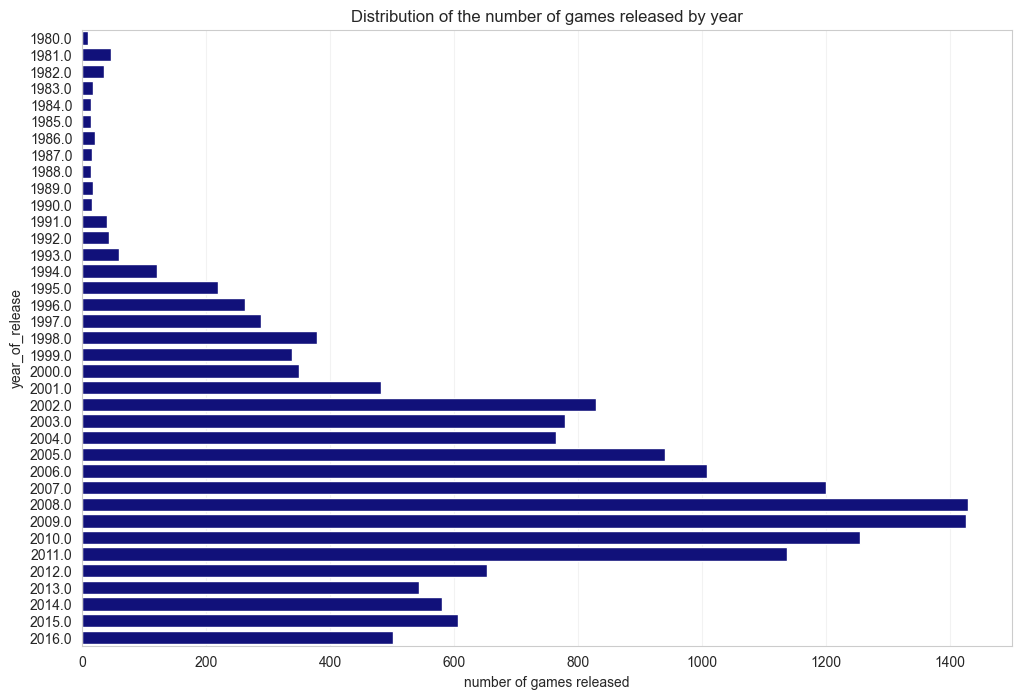

In [41]:
#Choosing Grid Style and reducing Grid Transperency
sns.set_style('whitegrid', {'grid.color': '.95'})

#Plotting a horizontal bar chart
plt.figure(figsize=(12,8))

sns.barplot(y='year_of_release', x='games_number', data=games_per_year, orient='h', color='darkblue')

#Styling and labeling
plt.xlabel('number of games released')
plt.title('Distribution of the number of games released by year')

plt.show()

The graph shows that the bulk of games were released in the first decade of the twenty-first century, with a peak in 2008-2009. After 2011, there was a significant decline in the number of games released (the rise in popularity of social media?).

Let's estimate the cumulative percentage of the number of released games

In [42]:
#Calculating cumulative sum and cumulative percentage
games_per_year['cumulative_sum'] = games_per_year['games_number'].cumsum()
games_per_year['cumulative_percentage'] = (games_per_year['cumulative_sum'] / games_per_year['games_number'].sum()) * 100

games_per_year

,year_of_release,games_number,cumulative_sum,cumulative_percentage
0,1980.0,9,9,0.054665
1,1981.0,46,55,0.334062
2,1982.0,36,91,0.552721
3,1983.0,17,108,0.655977
4,1984.0,14,122,0.741011
5,1985.0,14,136,0.826045
6,1986.0,21,157,0.953596
7,1987.0,16,173,1.050777
8,1988.0,15,188,1.141885
9,1989.0,17,205,1.245141


Building a cumulative chart of the percentage of games released.

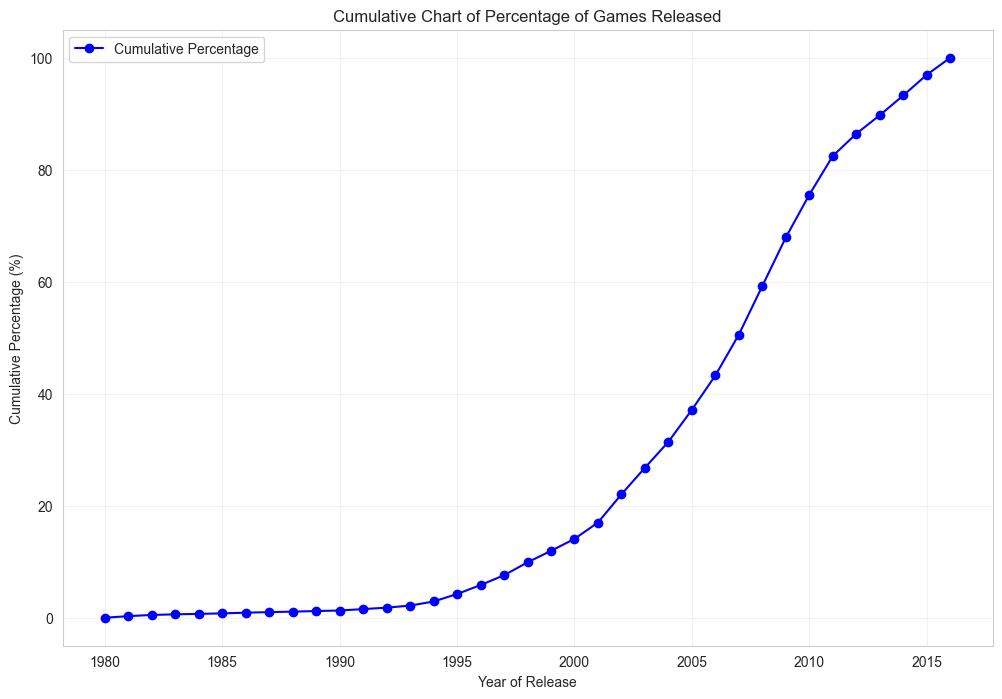

In [43]:
#Plotting
plt.figure(figsize=(12, 8))
plt.plot(games_per_year['year_of_release'], games_per_year['cumulative_percentage'], label='Cumulative Percentage', marker='o', linestyle='-', color='b')

# Styling and Labeling
plt.title('Cumulative Chart of Percentage of Games Released')
plt.xlabel('Year of Release')
plt.ylabel('Cumulative Percentage (%)')
plt.legend()

# Display
plt.grid(True)
plt.show()

According to the data obtained, it is clearly seen that during the first half of the period presented (from 1983 to 1999), about 11% of the total number of games released were released, and during the second half, the remaining 89%. Half of the games released were released between 2007 and 2016. Thus, we can conclude that the data for the 80s and 90s of the twentieth century do not have much weight in quantitative value for the existing data set.

Let's look at the dynamics of total sales.

In [44]:
#Getting the required data slice
df_sales=df.groupby('year_of_release', as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

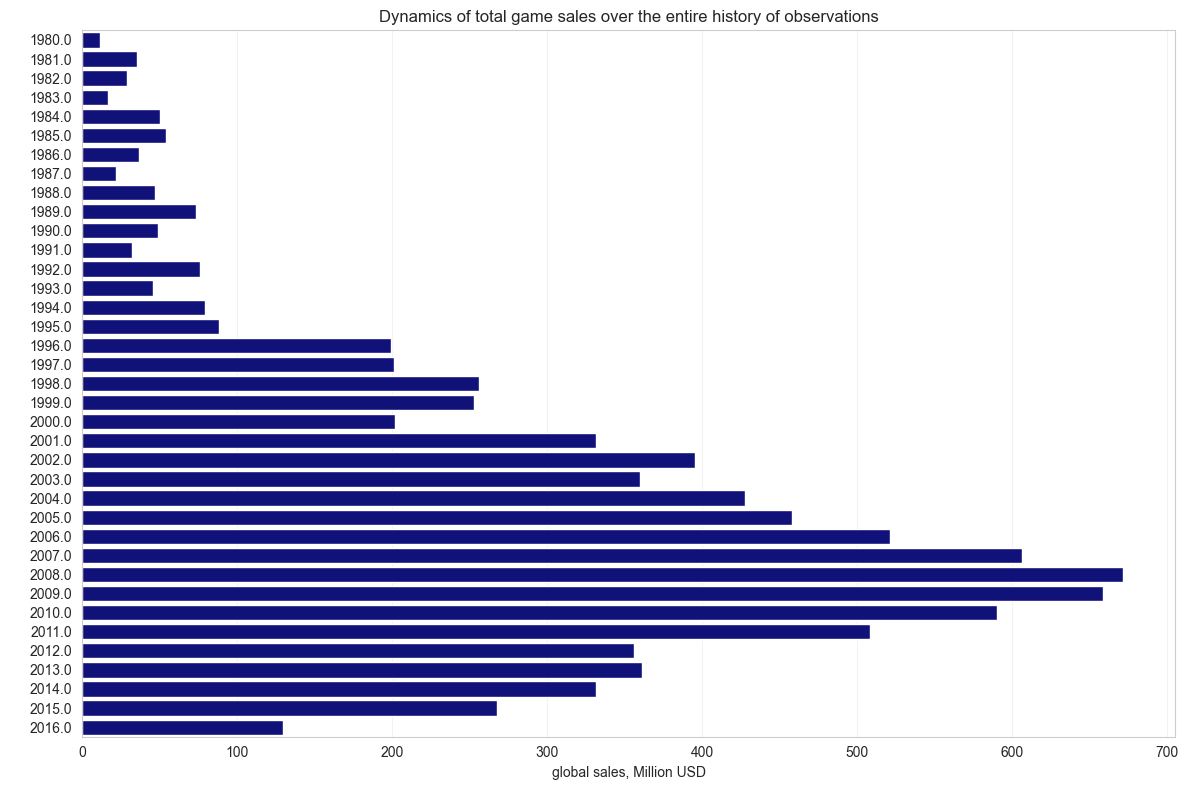

In [45]:
#Plotting
plt.figure(figsize=(12, 8))

sns.barplot(y=df_sales.year_of_release, x=df_sales.global_sales, orient='h', color='darkblue')

# axis labels and titles
plt.xlabel('global sales, Million USD')
plt.ylabel(' ')
plt.title('Dynamics of total game sales over the entire history of observations')

plt.tight_layout()
plt.show()

The overall sales trends closely mirror the patterns of new game releases, reaching a peak in 2008-2009 and subsequently declining to levels reminiscent of the early 2000s when the computer games industry was in its nascent stages.

Next, let's examine the distribution of sales across different gaming platforms. We aim to identify platforms that were popular in the past as well as those currently in demand. This analysis will help us assess the life cycle of various gaming platforms.

### Sales Variation by Platform

In [46]:
#Counting sales grouped by platform
plt_sales=df.groupby('platform', as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

plt_sales

,platform,global_sales
16,PS2,1247.28
28,X360,961.88
17,PS3,931.34
26,Wii,892.37
4,DS,802.79
15,PS,729.04
18,PS4,314.14
6,GBA,312.88
19,PSP,290.38
2,3DS,257.81


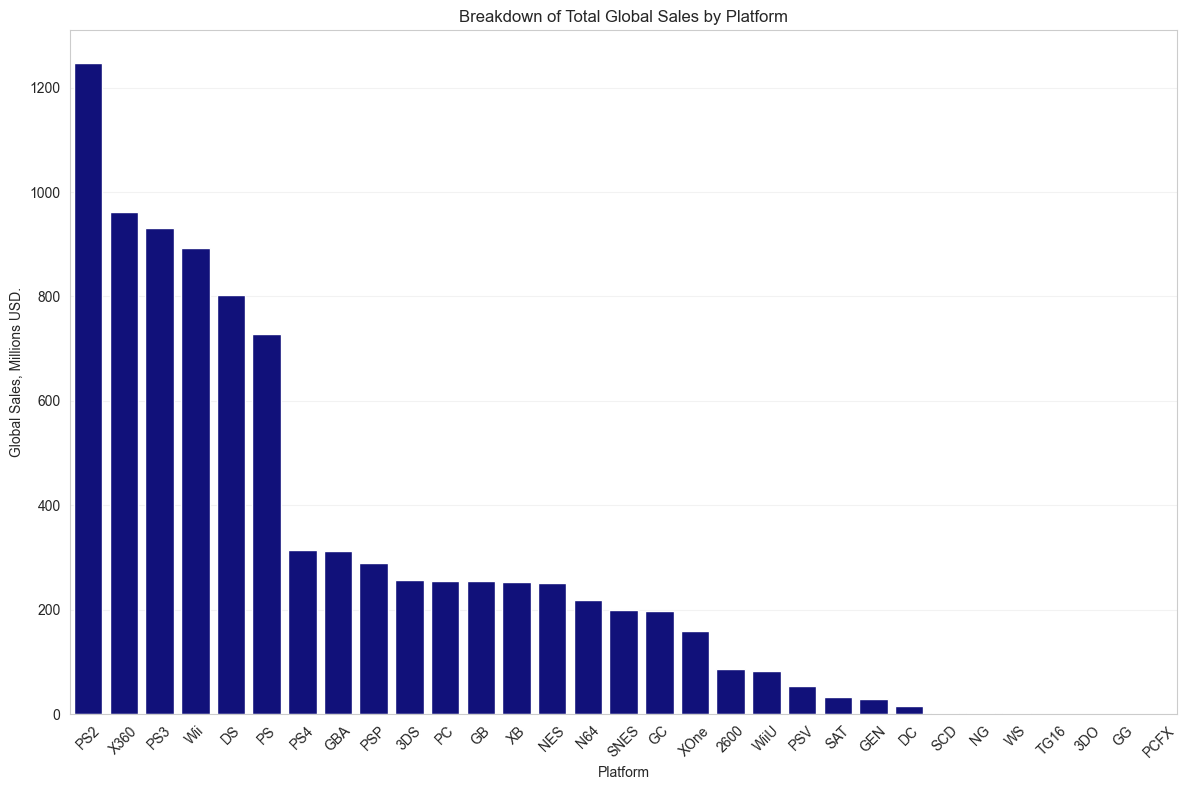

In [47]:
#Plotting
plt.figure(figsize=(12,8))

sns.barplot(x='platform',y='global_sales', data=plt_sales, color='darkblue')

#Styling and Labeling
plt.title('Breakdown of Total Global Sales by Platform')
plt.ylabel('Global Sales, Millions USD.')
plt.xlabel('Platform')
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

plt.tight_layout()
plt.show()

The graph distinctly displays the frontrunners in total global sales: PS2, X360, PS3, Wii, DS, and PS. These platforms exhibit a considerable lead, with sales figures surpassing the next revenue-generating platform, PS4, by 2-4 times. Data from the top 6 platforms emerges as the primary contender for further detailed analysis. However, it is imperative to first assess the relevance of specific platforms.

To evaluate the dynamics of platform popularity over the years, we will focus on platforms with total sales exceeding the median value. In other words, we will consider the first half of the list ranked by global sales volumes.

In [48]:
#Create a list of platform names with total global sales greater than the median value
platforms_above_median = []

for row in plt_sales.itertuples(): #Iterating over the dataframe
    if row.global_sales>plt_sales.global_sales.median(): #Comparing sales values with median
        platforms_above_median.append(row.platform) #Adding the platform name to the list

platforms_above_median

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'PC',
 'GB',
 'XB',
 'NES',
 'N64']

In [49]:
#Selecting data for platforms with total sales above the median
plt_sales_year=df.query('platform in @platforms_above_median') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)

plt_sales_year

,year_of_release,platform,global_sales
0,1983.0,NES,10.96
1,1984.0,NES,50.08
2,1985.0,DS,0.02
3,1985.0,NES,53.44
4,1985.0,PC,0.04
...,...,...,...
158,2016.0,3DS,15.14
159,2016.0,PC,5.25
160,2016.0,PS3,3.60
161,2016.0,PS4,69.25


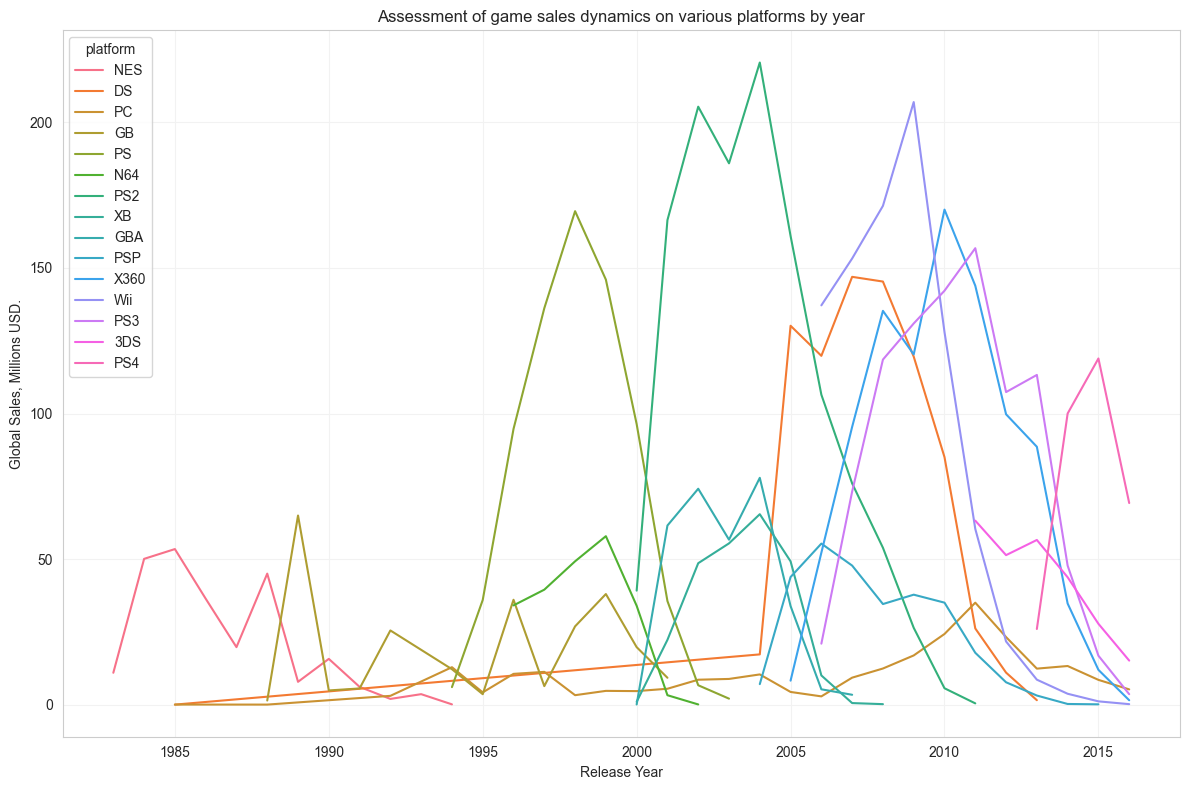

In [50]:
#Plotting
plt.figure(figsize=(12, 8))

sns.lineplot(x='year_of_release', y='global_sales', data=plt_sales_year, hue='platform');

#Styling and Labeling
plt.xlabel('Release Year')
plt.ylabel('Global Sales, Millions USD.');
plt.title('Assessment of game sales dynamics on various platforms by year');

plt.tight_layout()
plt.show()

Let's create a distribution graph depicting the life cycle of platforms. We'll examine the key statistics associated with the resulting metric.

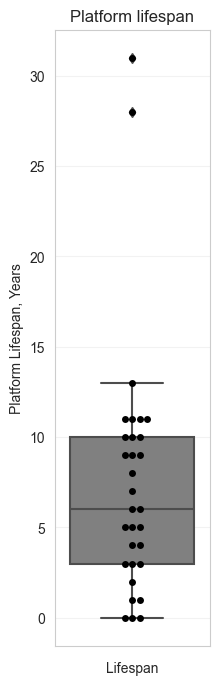

In [51]:
#Calculating Lifespan of Platforms
life_span=df.groupby('platform').year_of_release.max() - df.groupby('platform').year_of_release.min()

#Plotting
plt.figure(figsize=(2,8))
sns.boxplot(y=life_span, color='grey')
sns.swarmplot(y=life_span, color='black')

#Styling and Labeling
plt.title('Platform lifespan')
plt.xlabel('Lifespan')
plt.ylabel('Platform Lifespan, Years');

plt.show()

The graph shows that there are two outliers; otherwise, most of the data fits within the interquartile range. Due to the presence of outliers, we will use the median value (6 years) when we talk about the average value of the platform life cycle.

In [52]:
#Basic platform life cycle statistics
life_span.describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year_of_release, dtype: float64

The generated plots clearly indicate that, on average, the lifespan of a platform is 6 years, with PC and DS being the only exceptions. Additionally, it is evident that the sales leader, PS2, has already reached the end of its lifecycle, with its last sales recorded in 2011. Consequently, selecting data solely based on historical sales volume would lead to inaccuracies in our research findings. To address this, we will adopt a different criterion for our sample selection: specifically, we will use half the value of the third quartile (equivalent to 5 years). This approach ensures that our sample encompasses both platforms at the height of their popularity and emerging platforms with future potential.

In [53]:
#Grouping platform data for the last 5 years by year and platform and calculating total global sales
plt_sales_5year=df.query('year_of_release > 2011') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)

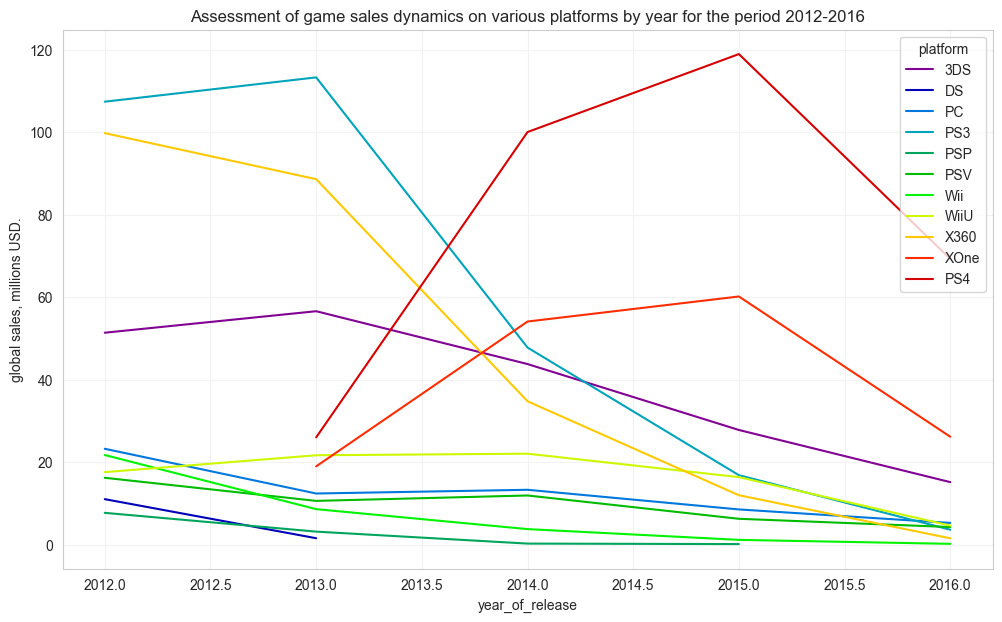

In [54]:
#Plotting
plt.figure(figsize=(12,7))

sns.lineplot(x='year_of_release', y='global_sales',data=plt_sales_5year, hue='platform', palette='nipy_spectral')

#Labeling
plt.ylabel('global sales, millions USD.');
plt.title('Assessment of game sales dynamics on various platforms by year for the period 2012-2016');

plt.show()

Taking into account that our data for 2016 is incomplete, when adjusted for this, we can conclude, using the graph above, that currently, only two platforms show growth and promise: PS4 and XOne. The 3DS still retains some level of popularity. Sales on other platforms are either insignificant or approaching zero. 

#### Therefore, at this stage of the research, we will focus on these three platforms: PS4, XOne, and 3DS.

For the next phase of the analysis, let's create a subset of the dataframe containing data for the last 5 years only for the three selected platforms based on the results of the previous step. We will then delve into the sales breakdown for each platform.

In [55]:
#List of names of the three most relevant platforms
popular_platforms=['PS4', 'XOne', '3DS']

#Selecting by platform name and year
df_3p=df.query('platform in @popular_platforms & year_of_release > 2011').reset_index(drop=True)

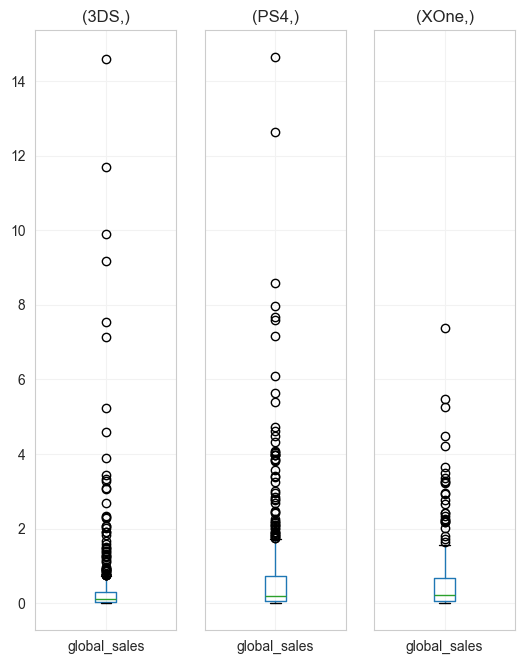

In [56]:
#Building a boxplot type graph (global sales broken down by platform)
df_3p.groupby(['platform']).boxplot(column='global_sales', figsize=(6, 8), layout=(1, 3))
plt.show()

Furthermore, we will gather the primary statistical metrics for our cross-section.

In [57]:
#Getting descriptive statistics
df_3p.groupby(['platform']).global_sales.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


From the generated graph, it is evident that the mean values for all platforms are roughly similar. Additionally, the presence of numerous outliers across all platforms suggests that the primary revenue is derived from a small number of blockbuster games. The sales of these games are 11-20 times higher than the average total sales (Ratio between max and mean). Furthermore, both in terms of the total number and the magnitude of this effect, there are more such blockbuster games on the 3DS and PS4 platforms.

Now, let's identify the game with the highest global sales for each platform.

In [58]:
#Selecting indexes
df_3p.groupby(['platform']).global_sales.idxmax()

platform
3DS      1
PS4      0
XOne    11
Name: global_sales, dtype: int64

In [59]:
#Displaying the best-selling games based on selected indices
df_3p.iloc[[1,0,11]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
1,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
11,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39


For the PS4 and XOne platforms, the top-selling game was 'Call of Duty: Black Ops 3 (2015)'. Meanwhile, for the 3DS, the leading game was 'Pokemon X/Pokemon Y' from 2013. This observation supports the hypothesis that the popularity of 3DS has declined in recent years.

Now, let's examine how user and critic reviews influence sales within a particular popular platform. We'll create scatter plots and compute correlation coefficients between reviews and sales.

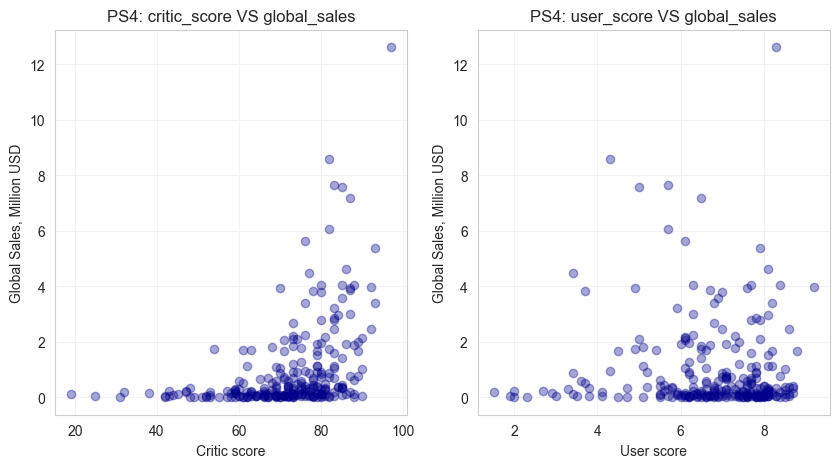

In [60]:
#Slicing data by platform name
df_ps4 = df_3p.query('platform == "PS4"')

#Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

#Scatter Plot 1
ax1.scatter(x='critic_score', y='global_sales', data=df_ps4 , alpha=0.35, color='darkblue')

#Labeling
ax1.set_title('PS4: critic_score VS global_sales')
ax1.set_xlabel('Critic score')
ax1.set_ylabel('Global Sales, Million USD')

#Scatter Plot 2
ax2.scatter(x='user_score', y='global_sales', data=df_ps4 , alpha=0.35, color='darkblue')

#Labeling
ax2.set_title('PS4: user_score VS global_sales')
ax2.set_xlabel('User score')
ax2.set_ylabel('Global Sales, Million USD')

plt.show()

In [61]:
# Calculation and display of correlation coefficients
print('PS4:')
print('Correlation coefficient of global sales and critics scores:', round(df_ps4['global_sales'].corr(df_ps4['critic_score']), 3))
print('Correlation coefficient of global sales and user scores:', round(df_ps4['global_sales'].corr(df_ps4['user_score']), 3))

PS4:
Correlation coefficient of global sales and critics scores: 0.407
Correlation coefficient of global sales and user scores: -0.032


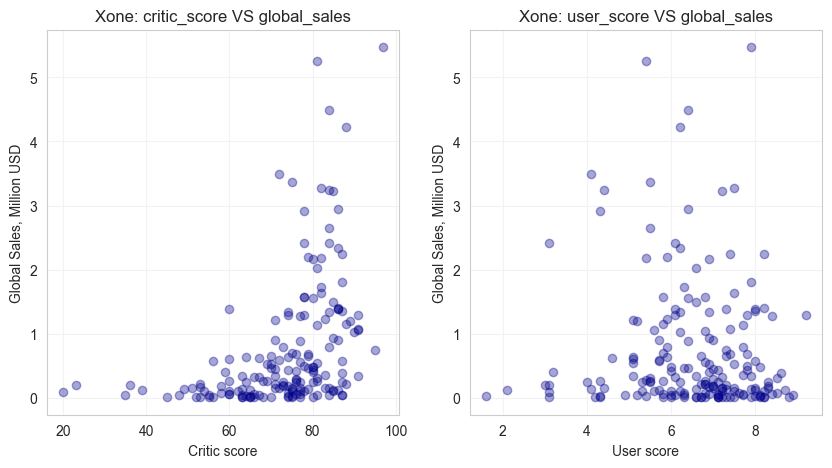

In [62]:
#Slicing data by platform name
df_xone = df_3p.query('platform == "XOne"')

#Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

#Scatter Plot 1
ax1.scatter(x='critic_score', y='global_sales', data=df_xone , alpha=0.35, color='darkblue')

#Labeling
ax1.set_title('Xone: critic_score VS global_sales')
ax1.set_xlabel('Critic score')
ax1.set_ylabel('Global Sales, Million USD')

#Scatter Plot 2
ax2.scatter(x='user_score', y='global_sales', data=df_xone , alpha=0.35, color='darkblue')

#Labeling
ax2.set_title('Xone: user_score VS global_sales')
ax2.set_xlabel('User score')
ax2.set_ylabel('Global Sales, Million USD')

plt.show()

In [63]:
#Calculation and display of correlation coefficients
print('Xone:')
print('Correlation coefficient of global sales and critics scores:', round(df_xone['global_sales'].corr(df_xone['critic_score']), 3))
print('Correlation coefficient of global sales and user scores:', round(df_xone['global_sales'].corr(df_xone['user_score']), 3))

Xone:
Correlation coefficient of global sales and critics scores: 0.417
Correlation coefficient of global sales and user scores: -0.069


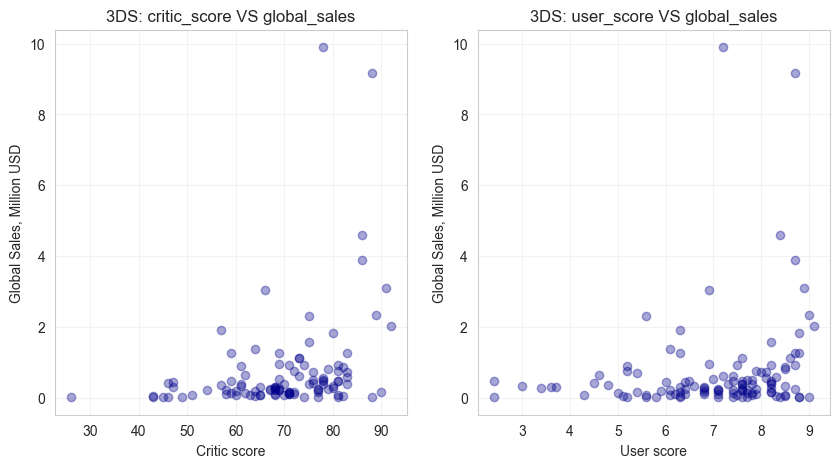

In [64]:
#Slicing data by platform name
df_3ds = df_3p.query('platform == "3DS"')

#Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

#Scatter Plot 1
ax1.scatter(x='critic_score', y='global_sales', data=df_3ds , alpha=0.35, color='darkblue')

#Labeling
ax1.set_title('3DS: critic_score VS global_sales')
ax1.set_xlabel('Critic score')
ax1.set_ylabel('Global Sales, Million USD')

#Scatter Plot 2
ax2.scatter(x='user_score', y='global_sales', data=df_3ds , alpha=0.35, color='darkblue')

#Labeling
ax2.set_title('3DS: user_score VS global_sales')
ax2.set_xlabel('User score')
ax2.set_ylabel('Global Sales, Million USD')

plt.show()

In [65]:
#Calculation and display of correlation coefficients
print('3DS:')
print('Correlation coefficient of global sales and critics scores:', round(df_3ds['global_sales'].corr(df_3ds['critic_score']), 3))
print('Correlation coefficient of global sales and user scores:', round(df_3ds['global_sales'].corr(df_3ds['user_score']), 3))

3DS:
Correlation coefficient of global sales and critics scores: 0.321
Correlation coefficient of global sales and user scores: 0.198


The correlation between sales and critic ratings is weak, and the correlation between sales and user ratings is very weak—almost zero for PS4 and XOne. These findings hold true for all three platforms under consideration. The correlation between sales and critic ratings is around 0.41 for PS4 and XOne, and approximately 0.32 for 3DS.

Moving forward, let's examine the overall distribution of games by genre for the previously selected data, which includes platforms PS4, XOne, and 3DS, and encompasses data from 2012 onward

In [66]:
#Grouping by genre, sorting and retrieving data
genres_sales_all=df_3p.groupby(['genre'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)
genres_sales_all

,genre,global_sales
0,Action,178.90
8,Shooter,149.02
7,Role-Playing,118.84
10,Sports,86.58
4,Platform,27.73
3,Misc,25.07
6,Racing,22.21
9,Simulation,21.85
2,Fighting,19.56
1,Adventure,13.32


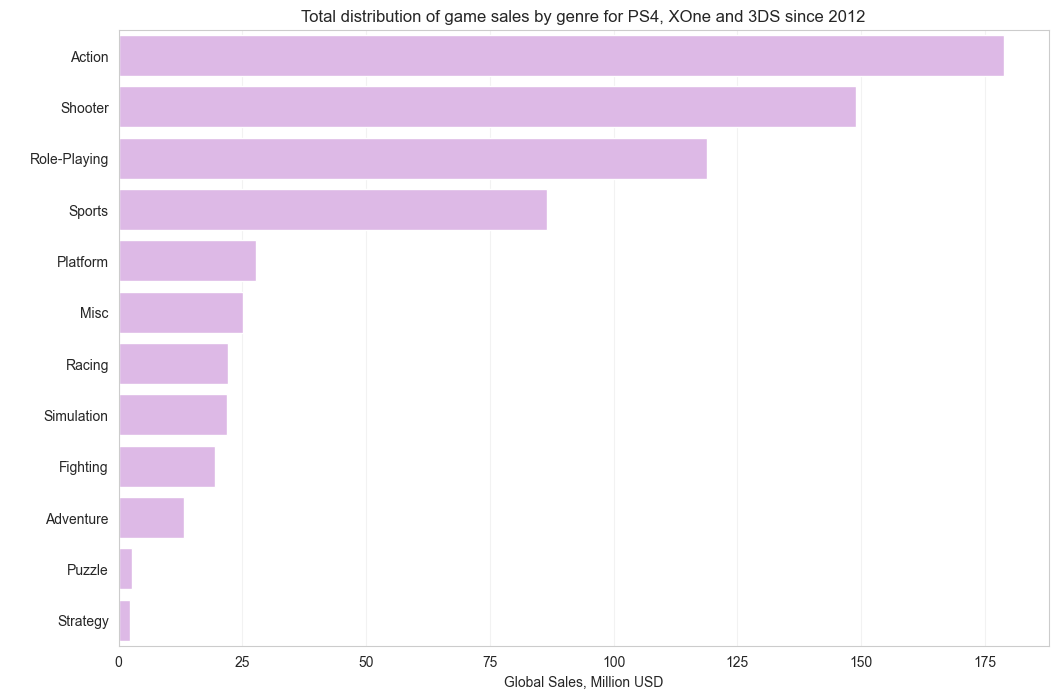

In [67]:
#Plotting
plt.figure(figsize=(12, 8))

#Creating Bar Chart
sns.barplot(y='genre', x='global_sales', data=genres_sales_all, orient='h', color='#e2b2ed', errorbar=None)

#Labeling
plt.xlabel('Global Sales, Million USD')
plt.ylabel(' ')
plt.title('Total distribution of game sales by genre for PS4, XOne and 3DS since 2012')

plt.show()

The most popular genres are Action, Shooter, and Role-Playing, with the Sports genre taking the fourth spot. Sales for games in other genres show significant variations. Sales of games in the least popular genres, namely Puzzle and Strategy, are much lower compared to other genres.

Now, let's explore the popularity of genres on each platform.

In [68]:
#Grouping by genres and platforms, sorting and retrieving data
genres_sales = df_3p.groupby(['genre', 'platform'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

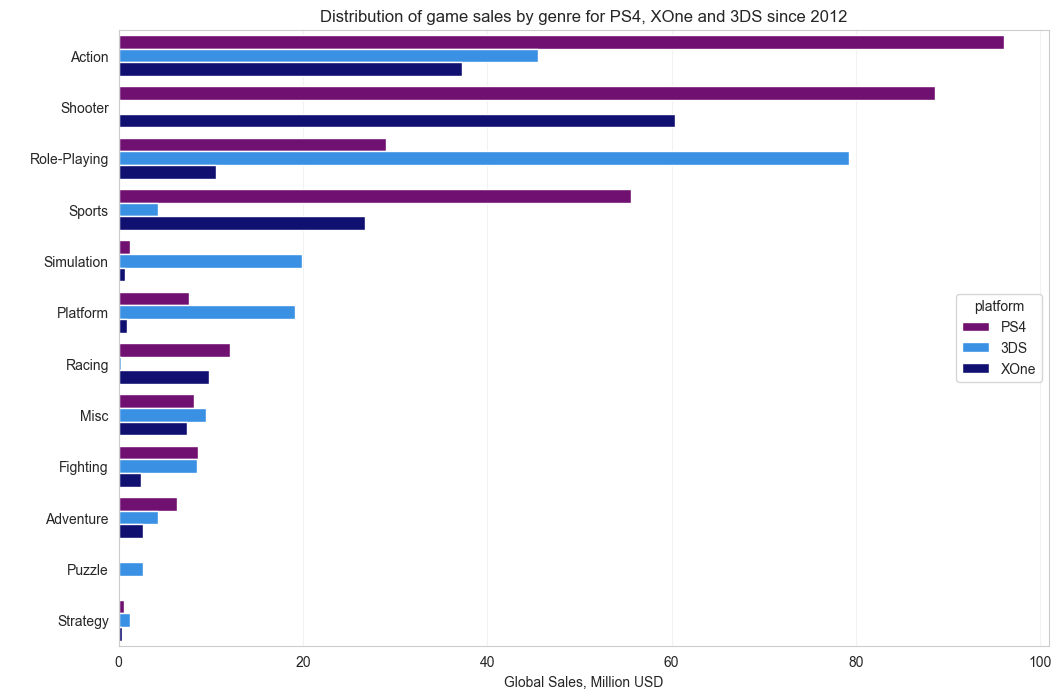

In [69]:
#Plotting
plt.figure(figsize=(12, 8))

#Creating Bar Chart
sns.barplot(y='genre', x='global_sales', data=genres_sales, orient='h',
                  palette=['purple', '#1E90FF', '#000080'],
                  hue='platform',
                  hue_order=['PS4', '3DS', 'XOne']);

# axis labels and titles
plt.xlabel('Global Sales, Million USD')
plt.ylabel(' ')
plt.title('Distribution of game sales by genre for PS4, XOne and 3DS since 2012');

It is interesting to note that the 3DS platform stands out in terms of genre preferences. For example, the Shooter genre is not at all popular on it, while Role-Playing takes first place by a wide margin. The Sports genre (4th place in the overall ranking) is the most popular among PS4 users.

## Conclusions

In this phase, we conducted an exploratory data analysis, revealing notable patterns and trends:

**1.Game Releases Over Time:** The distribution of game releases across different periods is evident, with a significant portion released between 2007 and 2016.

**2.Platform Popularity Lifecycle:** The study highlighted an average lifespan of around 6 years for gaming platforms, indicating a distinct life cycle of platform popularity.

**3.Identified Relevant Platforms:** Following the analysis, three platforms emerged as particularly relevant and promising for the next few years—PS3, XOne, and 3DS.

**4.Correlation Analysis:** A correlation assessment between critic ratings, user ratings, and sales was performed. Critic ratings exhibited a weak correlation with sales, while user ratings demonstrated a very weak correlation, virtually zero.

**5.Popular Genres:** The most favored game genres over the last 5 years were identified as Action, Shooter, and Role-Playing.

**6.Genre Preferences by Platform:** Notably, the 3DS platform exhibited distinctive genre preferences. For instance, Shooter games lacked popularity on this platform, while Role-Playing claimed the top spot by a considerable margin. On PS4, Sports games were particularly popular, ranking fourth overall.

**7.Revenue from Hit Games:** It was observed that a majority of the total revenue is generated by a small number of blockbuster games. The sales of these games surpass average game sales by a significant margin, ranging from tens to multiples.

These findings provide valuable insights into the dynamics of the gaming industry, enabling informed decision-making and strategic planning for future endeavors.

# Stage 4: User Profile for Each Region

In this stage, we aim to identify the preferences of users in each region by examining the most popular platforms, favored genres, and evaluating the influence of ESRB ratings on sales. 

To achieve this, we will focus on the latest data, constructing a sample spanning the last 5 years, commencing from 2012.

In [70]:
#Selecting data for the last five years
df_4=df[df['year_of_release'] > 2011].reset_index(drop=True)

Determining the popularity of platforms by region.

In [71]:
#Getting the required data slice
df_4_region=df_4[['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
     .groupby('platform', as_index=False) \
     .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
     .melt(id_vars=['platform']) \
     .sort_values('value', ascending=False)

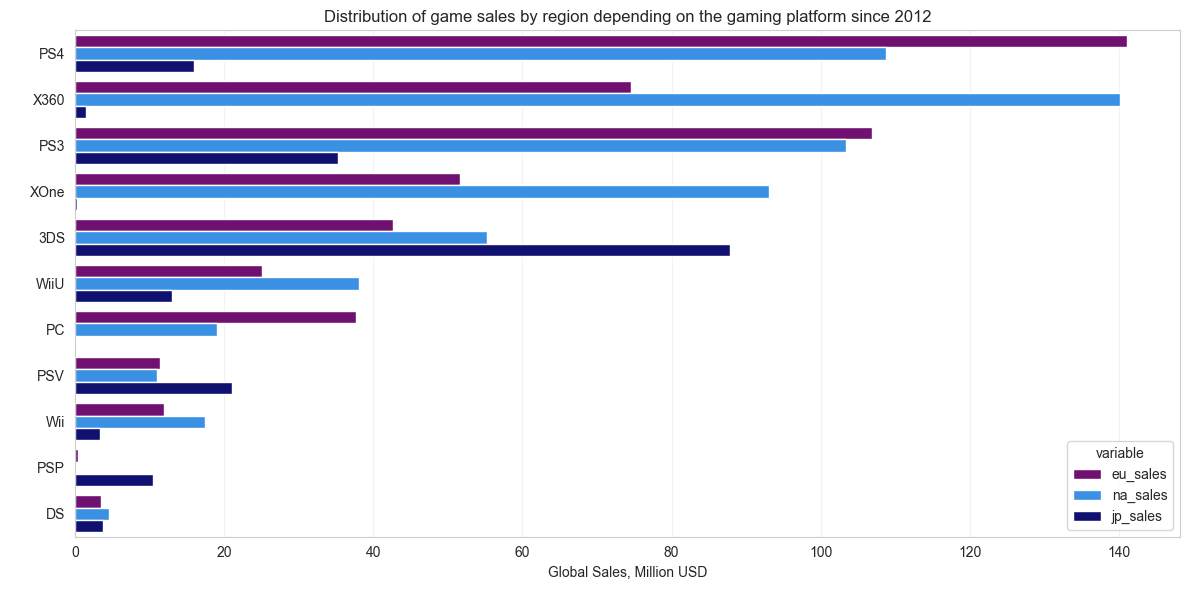

In [72]:
#Plotting
plt.figure(figsize=(12, 6))

#Creating bar chart
sns.barplot(y='platform', x='value', data=df_4_region, orient='h', palette=['purple', '#1E90FF', '#000080'], hue='variable')

# axis labels and titles
plt.xlabel('Global Sales, Million USD')
plt.ylabel(' ')
plt.title('Distribution of game sales by region depending on the gaming platform since 2012')

plt.tight_layout()
plt.show()

The list of Top 5 platforms is as follows:

- PS4
- X360
- PS3
- XOne
- 3DS

Note that in the European market the most popular platforms are from the manufacturer Sony (PS4, PS3), while in North America the most popular gaming consoles are Microsoft (X360 and its successor XOne). In Japan, the most popular platform is the 3DS produced by the local company Nintendo.

#### Let's determine the most popular game genres by region.

In [73]:
#Getting the required data slice
df_4_genre = df_4[['genre', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('genre', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

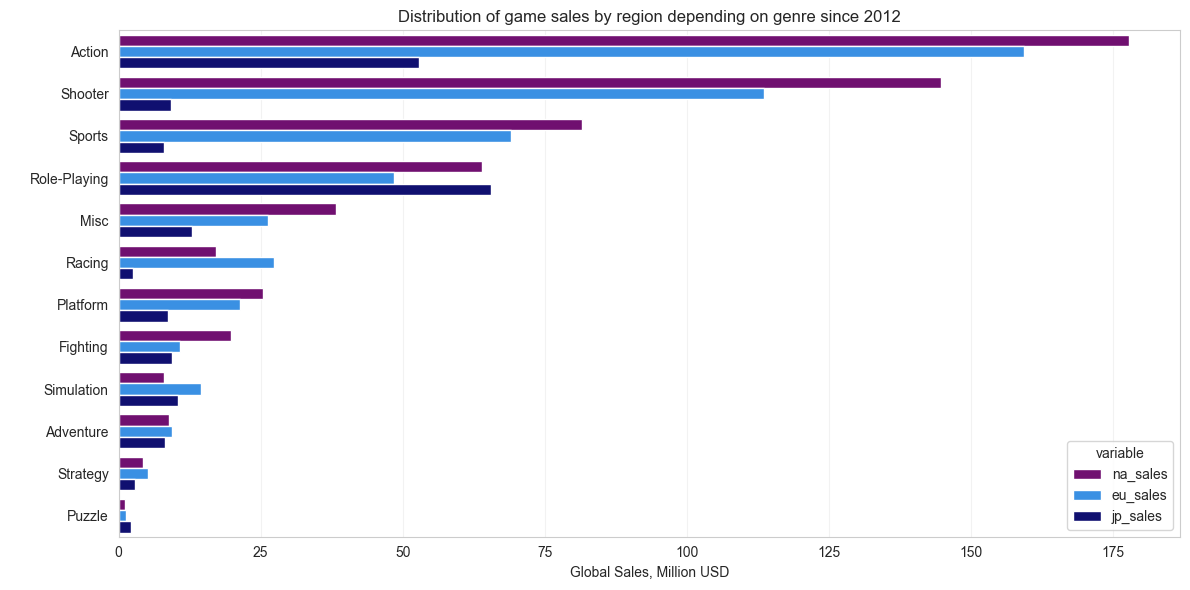

In [74]:
#Plotting
plt.figure(figsize=(12, 6))

#Creating bar chart
sns.barplot(y='genre', x='value', data=df_4_genre, orient='h', palette=['purple', '#1E90FF', '#000080'], hue='variable')

# axis labels and titles
plt.xlabel('Global Sales, Million USD')
plt.ylabel(' ')
plt.title('Distribution of game sales by region depending on genre since 2012')

plt.tight_layout()
plt.show()

List of Top 5 most popular genres:

- Action
- Shooter
- Sports
- Role-Playing
- Misc

Note that shooters are significantly less popular in Japan compared to Europe and North America. In the Japanese archipelago, the most popular genres are Role-Playing and Action. 

#### Let's look at the impact of the ESRB rating on sales in a specific region

In [75]:
#Getting the required data slice
df_4_rating = df_4[['rating', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('rating', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['rating']) \
    .sort_values('value', ascending=False)

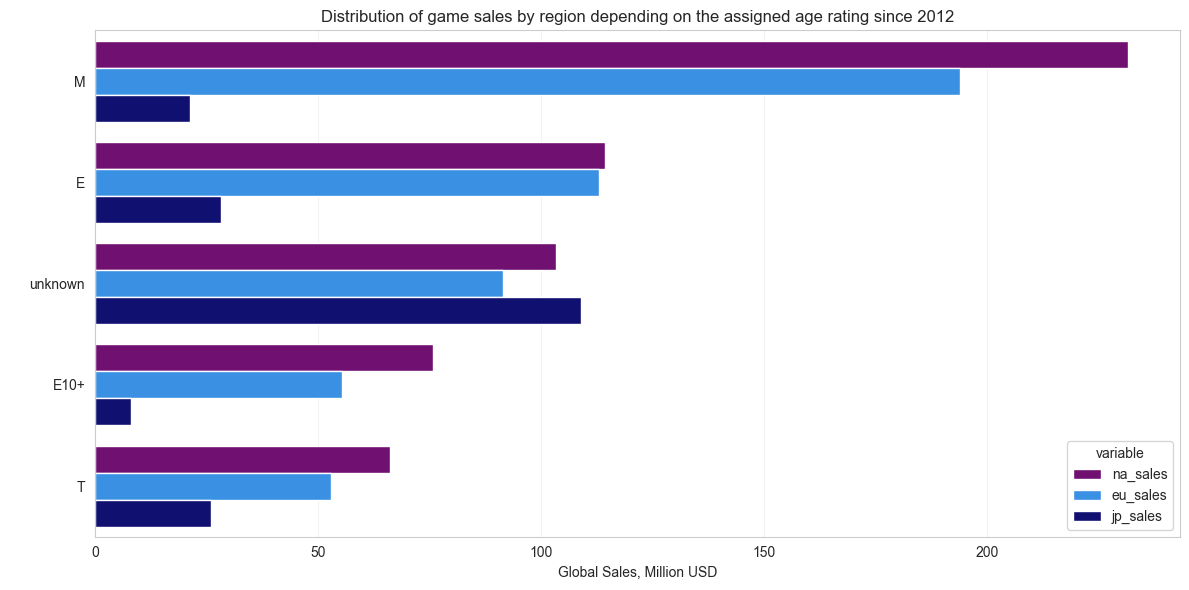

In [76]:
#Plotting
plt.figure(figsize=(12, 6))

#Creating bar chart
sns.barplot(y='rating', x='value', data=df_4_rating, orient='h', palette=['purple', '#1E90FF', '#000080'], hue='variable')

# axis labels and titles
plt.xlabel('Global Sales, Million USD')
plt.ylabel(' ')
plt.title('Distribution of game sales by region depending on the assigned age rating since 2012')

plt.tight_layout()
plt.show()

Games with an M rating (suitable for individuals over 16 years of age) are twice as popular as those in other rating categories in the European and North American markets. The remaining game categories are distributed relatively evenly across these markets. In Japan, the most popular games, which are also twice as popular as their closest competitors, are games with an unknown age rating. This could be attributed not only to user preferences but also to the possibility that the rating organizer (ESRB, based in New York City, New York, U.S.) might not be giving sufficient attention to games released locally in the Asian market.

## Conclusions:

Upon analysis, it is evident that the user profile in North America and Europe is quite similar, while consumers in Japan exhibit distinctions in terms of platform choice, favorite genre, and the situation with the ranking of best-selling games. Hence, it is crucial to consider historical and cultural differences between regions, as they directly influence user preferences in the business landscape.

# Stage 5. Study of statistical indicators

At this stage, we will study the user rating and critic rating in more detail. Let's explore statistical indicators.

Let's take the data slice used at the previous stage (data for the last 5 years (starting from 2012).

In [77]:
#Selecting data for the last five years
df_4=df[df['year_of_release'] > 2011].reset_index(drop=True)

In [78]:
#bringing critic_score to the user_score dimension by dividing by 10
df_4['critic_score']=df_4['critic_score']/10

In [79]:
df_5 = df_4.groupby('genre', as_index=False)\
     .agg({'critic_score': 'mean', 'user_score': 'mean'}) \
     .melt(id_vars=['genre']) \
     .sort_values('value', ascending=False)

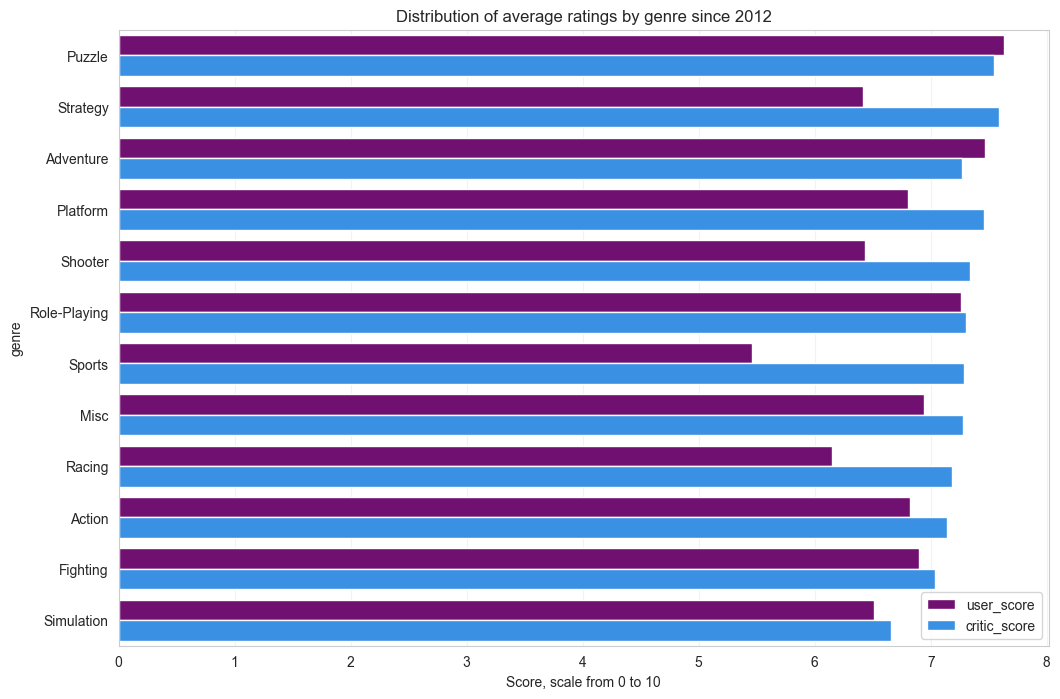

In [80]:
#Plotting
plt.figure(figsize=(12, 8))

#Creating Bar Chart
sns.barplot(y='genre', x='value', data=df_5, orient='h', palette=['purple', '#1E90FF'], hue='variable')

#Labeling
plt.legend(loc = 'best')
plt.xlabel('Score, scale from 0 to 10')
plt.title('Distribution of average ratings by genre since 2012')

plt.show()

- In most cases, critics' and users' ratings coincide quite well. Especially for the Puzzle and Role-Playing genres.
- The greatest discrepancies in ratings between critics and users are observed for the Sports and Racing genres (in both cases, critics are more favorable to the games compared to users).
- The genres Strategy, Platform and Puzzle have the highest average ratings from critics.
- It's interesting to note that for all genres, the average critic rating is almost always higher than the average user rating (exceptions: Puzzle and Adventure).

Let's look at the shape of the distribution of ratings from critics and users.


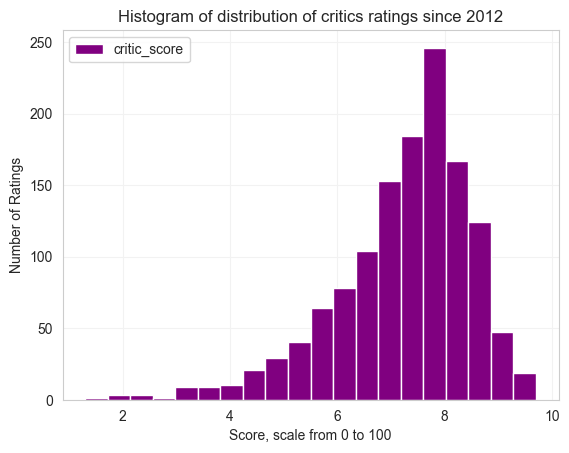

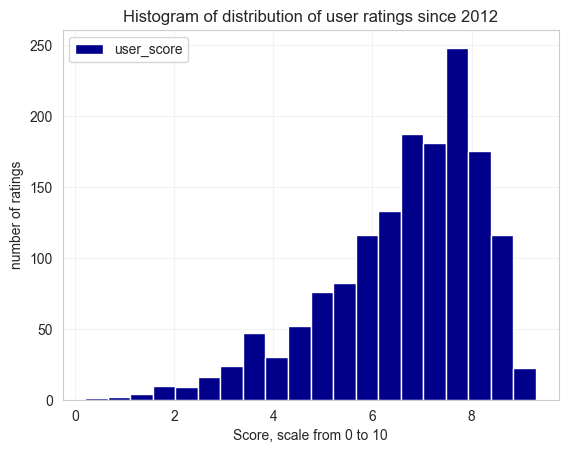

In [81]:
#Creating a histogram for critics' ratings
df_4.plot(y='critic_score',
           kind='hist',
           bins=20,
           color='purple')

#Labeling
plt.legend(loc='upper left')
plt.xlabel('Score, scale from 0 to 100')
plt.ylabel('Number of Ratings')
plt.title('Histogram of distribution of critics ratings since 2012')


#Creating a histogram for user ratings
df_4.plot(y='user_score',
           kind='hist',
           bins=20,
           color='darkblue')

#Labeling
plt.legend(loc='best')
plt.xlabel('Score, scale from 0 to 10')
plt.ylabel('number of ratings')
plt.title('Histogram of distribution of user ratings since 2012')

plt.show()

The distributions of both critics' and users' ratings appear to be close to normal. They are unimodal and symmetrical in shape.

This suggests that there are no significant errors in the data, and they can be considered truly independent and randomly distributed relative to each other. Consequently, we can utilize basic statistical methods for testing various hypotheses in future analyses.

Now, let's examine the distribution of key statistics for critics' and users' ratings, including mean, variance, and standard deviation.

In [82]:
#Count Statistics
# maximum values for each column are highlighted in green
# minimum values for each column are highlighted in red
df_5_wide = df_4.groupby('genre', as_index=False)\
     .agg({'critic_score': ['mean', 'var', 'std'],
           'user_score': ['mean', 'var', 'std']}) \
     .style.highlight_min(axis=0, color='#FFC3C2') \
     .highlight_max(axis=0, color='#D8ECC1')

df_5_wide

## Conclusions:

Games belonging to the Strategy genre have received the highest average rating from critics, while those in the Simulation genre have received the lowest rating. The Sports genre exhibits the highest dispersion of ratings among critics, while Puzzle games show the least dispersion.

Puzzle genre games have garnered the highest average rating from users, whereas Sports genre games have received the lowest rating. The Strategy genre displays the greatest dispersion of ratings among users, while Puzzle games exhibit the least dispersion.

It is possible that among regular users, there exists a subgroup of game enthusiasts who hold a notably negative opinion of Sports genre games, resulting in these games receiving the lowest possible ratings. Critics, on the other hand, tend to base their evaluations on the overall quality of games rather than personal genre preferences. This discrepancy may explain the significant difference in ratings for Sports genre games between critics and users, as well as the highest spread of ratings (variance and standard deviation) for Sports genre games among users, following the Strategy genre.


# Stage 6. Testing hypotheses

### Hypothesis testing No. 1.

Null hypothesis: The average user ratings for the Xbox One and PC platforms are the same.

Alternative Hypothesis: Average user ratings for the Xbox One and PC platforms are different.

In [96]:
#Filtering the sample data required to test the hypothesis
sample_1=np.asarray(df_4.query('platform == "XOne"').user_score.to_list())
sample_2=np.asarray(df_4.query('platform == "PC"').user_score.to_list())

#Removing NaN values from our samples
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha=0.05 #Critical level of statistical significance
#If the p-value is less than it, we reject the hypothesis

#Checking for equality of variances
lv=st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
     param=True
     print('Both samples have similar variances')
else:
     print('The variances of the samples are different. We will use equal_var = False')
     param=False

    
#Conducting a t-test
results=st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)


print('p-value:', results.pvalue)

if results.pvalue<alpha:
     print("Reject the null hypothesis")
else:
     print("Failed to reject the null hypothesis")

The variances of the samples are different. We will use equal_var = False
p-value: 0.5489537965134912
Failed to reject the null hypothesis


The null hypothesis could not be rejected. Therefore, we have strong reasons to believe that the average ratings for the Xbox One and PC platforms are the same.

### Testing hypothesis No. 2.

Null hypothesis: The average user ratings for the Action and Sports genres are the same.

Alternative Hypothesis: Average user ratings for the Action and Sports genres are different.

In [97]:
#Filtering the sample data required to test the hypothesis
sample_1=np.asarray(df_4.query('genre=="Action"').user_score.to_list())
sample_2=np.asarray(df_4.query('genre=="Sports"').user_score.to_list())

#Removing NaN values from our samples
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha=0.05 #Critical level of statistical significance
#If the p-value is less than it, we reject the hypothesis

#Checking for equality of variances
lv=st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
     param=True
     print('Both samples have similar variances')
else:
     print('The variances of the samples are different. We will use equal_var = False')
     param=False

    
#Conducting a t-test
results=st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)


print('p-value:', results.pvalue)

if results.pvalue<alpha:
     print("Reject the null hypothesis")
else:
     print("Failed to reject the null hypothesis")

The variances of the samples are different. We will use equal_var = False
p-value: 4.24307776572644e-20
Reject the null hypothesis


We were able to reject the null hypothesis. Thus, we have strong reason to believe that the average user ratings for the Action and Sports genres are different.

### conclusions

At this stage, we were able to test two hypotheses about average user ratings. As a result of testing the hypotheses, we can now believe with a high degree of confidence that:

- **the average user ratings for the Xbox One and PC platforms are the same.**
- **The average user ratings for the Action and Sports genres are different.**

## Stage 7. Research results

#### Working hypotheses

Average user ratings for the Xbox One and PC platforms are the same;
The average user ratings for the Action and Sports genres are different.


### General conclusions

- Approximately half of all video games were released between 2007 and 2016.
- Global sales of released games reached their peak in 2008-2009, and the video game industry is currently experiencing a decline.
- The life cycle of a video game platform is estimated to be around 7-10 years.
- Promising platforms for the near future include PS4, XOne, and 3DS.
- The most popular game genres over the past 5 years are Action, Shooter, and Role-Playing.
- The majority of total revenue is generated by a small number of hit games, whose sales are tens of times higher than other games.
- The user profile in North America and Europe regions shows similar preferences, while Asian consumers stand out in their platform and genre choices. It is essential to consider historical and cultural differences between regions, as they directly influence user preferences in business.
- Ratings from critics and users exhibit an average correlation and generally align well with each other. However, it was observed that critics' and user ratings have limited influence on sales dynamics, with a weak correlation in both cases.
- Testing the hypotheses confirmed the first hypothesis and refuted the second.


### General Recommendations:

- Focus on selling games for the PS4, XOne, and 3DS platforms.
- Prioritize game development in the Action, Shooter, and Role-Playing genres.
- Consider the specifics of the Japaneese market when planning advertising campaigns.